In [1]:
import sys
import os
import io

root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_path)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from utils.model_pipeline import get_pipeline
from utils.train_predict_model import train_model, predict_model

## Read Data

In [4]:
file_path = os.path.abspath(os.path.join(os.getcwd(), '../data'))

In [5]:
train = pd.read_pickle(file_path + '/train.pkl')
test = pd.read_pickle(file_path + '/test.pkl')

In [6]:
train.shape, test.shape

((284309, 42), (35723, 42))

## Feature sets

The lists below contain the features available in the data.

- target_feature: the target feature
- drop_features: features that will be dropped and are not considered
- cat_features: the categorical features
- num_features: the numerical features 
- id_feature: the id feature

In [7]:
target = 'FirstPumpArriving_AttendanceTime_min'

drop_features = ['DateOfCall', 'CalYear', 'TimeOfCall', 'SpecialServiceType', 'Postcode_full',
                 'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughName', 'IncGeo_WardCode',
                 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m', 'Easting_rounded', 'Northing_rounded',
                 'Latitude', 'Longitude', 'FRS', 'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
                 'SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation',
                 'PumpCount', 'PumpHoursRoundUp', 'FirstPumpArriving_DeployedFromStation', 'IncGeo_BoroughCode']

cat_features = ['IncidentGroup', 'StopCodeDescription', 'PropertyCategory', 'PropertyType',
                'AddressQualifier', 'ProperCase', 'IncGeo_WardName', 'PartOfDay']

num_features = ['HourOfCall', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'Notional Cost (£)',
                'NumCalls', 'DateOfCall_Month']

id_feature = 'IncidentNumber'

full_list_features =  set(cat_features + num_features)

## Drop features & define modeling data sets 

In [8]:
train = train.drop(columns=drop_features, axis=1)
test = test.drop(columns=drop_features, axis=1)

In [9]:
train.shape, test.shape

((284309, 16), (35723, 16))

In [10]:
X_train = train.drop(columns=[target]+[id_feature])
y_train = train[target]
X_test = test.drop(columns=[target]+[id_feature])
y_test = test[target]

In [11]:
assert full_list_features ==  set(X_train.columns), 'missmatch in training and expected features'
assert full_list_features ==  set(X_test.columns), 'missmatch in test and expected features'

## LGBM
Default HP values.

In [12]:
pipe_lgbm = get_pipeline(num_features=num_features,
                         cat_features=cat_features,
                         algorithm='lgbm',
                         use_grid_search=False)

In [ ]:
# Example how to apply grid search to tune the HP

#pipe_lgbm = get_pipeline(num_features=num_features,
#                         cat_features=cat_features,
#                         algorithm='lgbm',
#                         use_grid_search=True,
#                         tuning_params={"estimator__colsample_bytree": [0.7,0.8,1.0],
#                                        "estimator__max_depth": [-1,10,20]}
#                        )

# Fit using grid search to tune the HP

#lgbm_grid = train_model(pipeline=pipe_lgbm,
#                        xtrain=X_train,
#                        ytrain=y_train)

# Predict the model with the best params

#predict_model(trained_model=lgbm_grid,
#              xtest=X_test,
#              ytest=y_test)

In [13]:
lgbm = train_model(pipeline=pipe_lgbm,
                   xtrain=X_train,
                   ytrain=y_train)

In [14]:
lgbm

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('StopCodeDescription_transformer',
                                  GroupRareLevelsTransformer(columns=['StopCodeDescription'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyCategory_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyCategory'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyType_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyT...
                                                   'NumPumpsAttending',
                                                   'Notional Cost (£)',
                                                   'NumCalls',
                                                   'DateOfCall_Month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IncidentGroup',
                                                   'StopCodeDescription',
                                                   'PropertyCategory',
                                                   'PropertyType',
                                                   'AddressQualifier',
                                                   'ProperCase',
                                                   'IncGeo_WardName',
                                                   'PartOfDay'])])),
                ('estimator',
                 LGBMRegressor(objective='regression_l1', random_state=24))])

In [15]:
predict_model(trained_model=lgbm,
              xtest=X_test,
              ytest=y_test)

Mean Squared Error: 4.326871730486148
Mean Absolute Error: 1.474296919682987
Root Mean Squared Error: 2.080113393660583


## XGBoost

In [16]:
pipe_xgboost = get_pipeline(num_features=num_features,
                            cat_features=cat_features,
                            algorithm='xgboost',
                            use_grid_search=False)

In [17]:
xgboost = train_model(pipeline=pipe_xgboost,
                      xtrain=X_train,
                      ytrain=y_train)

In [18]:
xgboost

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('StopCodeDescription_transformer',
                                  GroupRareLevelsTransformer(columns=['StopCodeDescription'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyCategory_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyCategory'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyType_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyT...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None,
                              objective='reg:squaredlogerror', predictor=None, ...))])

In [19]:
predict_model(trained_model=xgboost,
              xtest=X_test,
              ytest=y_test)

Mean Squared Error: 4.378836288252495
Mean Absolute Error: 1.481273278439762
Root Mean Squared Error: 2.0925669136857956


## RandomForest

In [20]:
pipe_rf = get_pipeline(num_features=num_features,
                       cat_features=cat_features,
                       algorithm='rf',
                       use_grid_search=False)

In [21]:
rf = train_model(pipeline=pipe_rf,
                 xtrain=X_train,
                 ytrain=y_train)

In [22]:
rf

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('StopCodeDescription_transformer',
                                  GroupRareLevelsTransformer(columns=['StopCodeDescription'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyCategory_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyCategory'],
                                                             cut_off_percent=0.05)),
                                 ('PropertyType_transformer',
                                  GroupRareLevelsTransformer(columns=['PropertyT...
                                                   'NumPumpsAttending',
                                                   'Notional Cost (£)',
                                                   'NumCalls',
                                                   'DateOfCall_Month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IncidentGroup',
                                                   'StopCodeDescription',
                                                   'PropertyCategory',
                                                   'PropertyType',
                                                   'AddressQualifier',
                                                   'ProperCase',
                                                   'IncGeo_WardName',
                                                   'PartOfDay'])])),
                ('estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=24))])

In [23]:
predict_model(trained_model=rf,
              xtest=X_test,
              ytest=y_test)

Mean Squared Error: 4.803707083318959
Mean Absolute Error: 1.6009857058672816
Root Mean Squared Error: 2.1917360888845536


## Conclusion

The LightGBM algorithm is chosen since it has the best model performance. However, the results can be further improved by tuning the HPs.

In [18]:
import matplotlib.pyplot as plt

def feature_imp(model, train_model, lim=None):
    """Takes the model and gives out the feuture importance plot 
    
    Parameters: 
    model: the fitted model
    train_model: this the training data frame without the target feature
    lim: the number of features to be considered for the generation of feature importance plot
    
    Returns:
    Feature importance plot
    """
    predictors = [x for x in train_model.columns]
    temp = pd.Series(model.feature_importances_, predictors).sort_values(
        ascending=False
    )
    if lim is None:
        lim = train_model.shape[1]
    temp.nlargest(lim).plot(kind='barh', figsize=(14,12))
    
    plt.title('Feature Importance Score')

In [19]:
features_order = num_features + cat_features

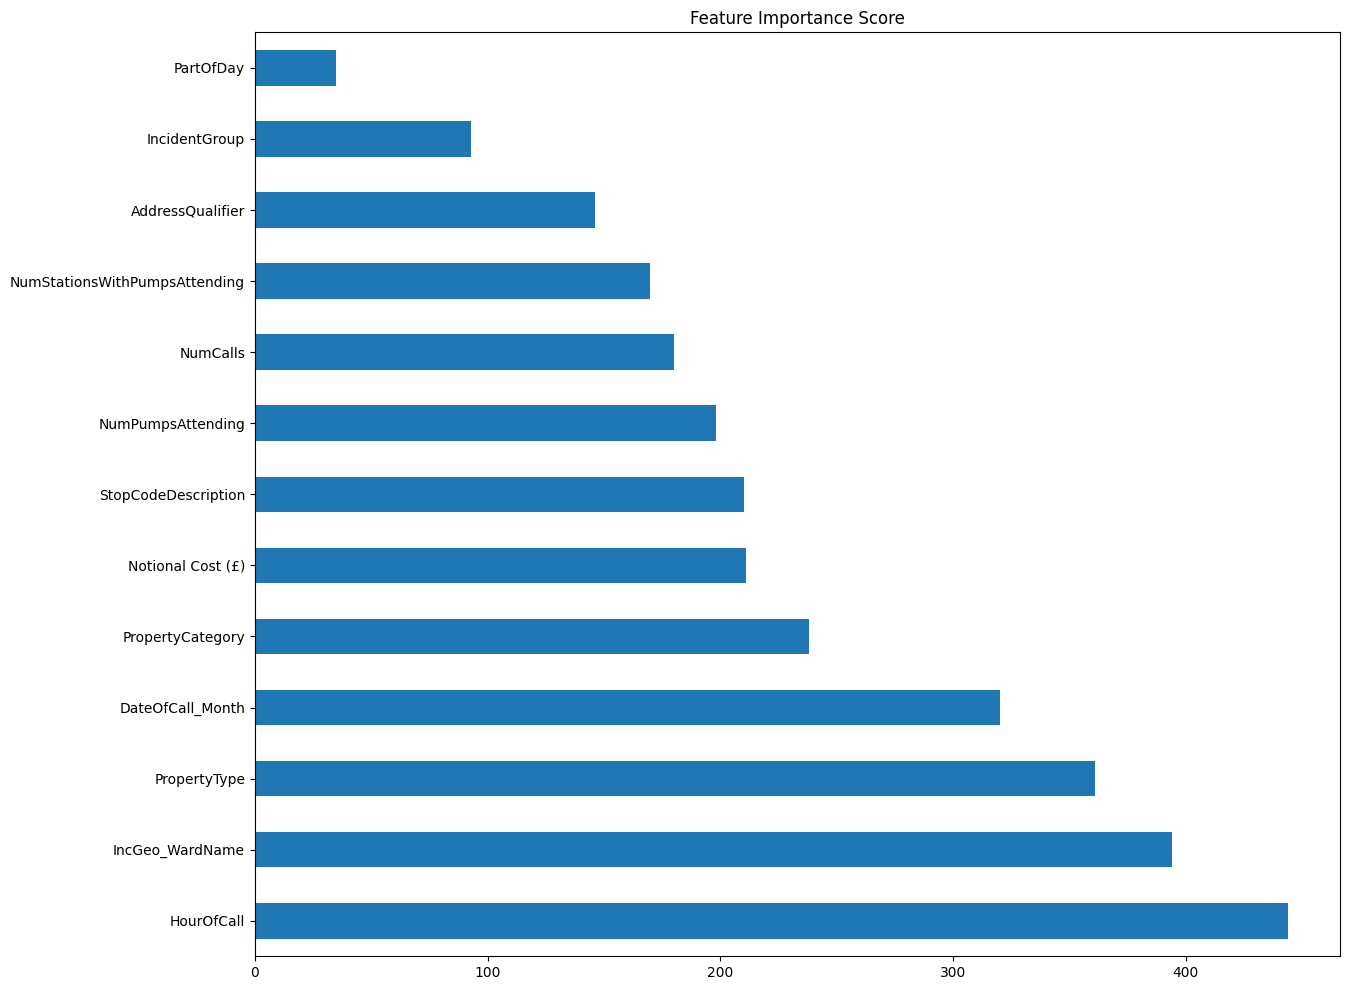

In [20]:
feature_imp(pipe._final_estimator, X_train[features_order])